## Advanced Lane Finding Project

### 02 Pipeline Images

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard image.**
* **Apply a distortion correction to raw images.**
* **Use color transforms, gradients, etc., to create a thresholded binary image.**
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [67]:
import cv2
import glob
import numpy as np
import pickle
import matplotlib.pyplot as plt

%matplotlib inline

## Load and show test images

In [71]:
# Load test images.
test_images = list(map(lambda filename: (filename, cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)), 
                      glob.glob('test_images/*.jpg')))

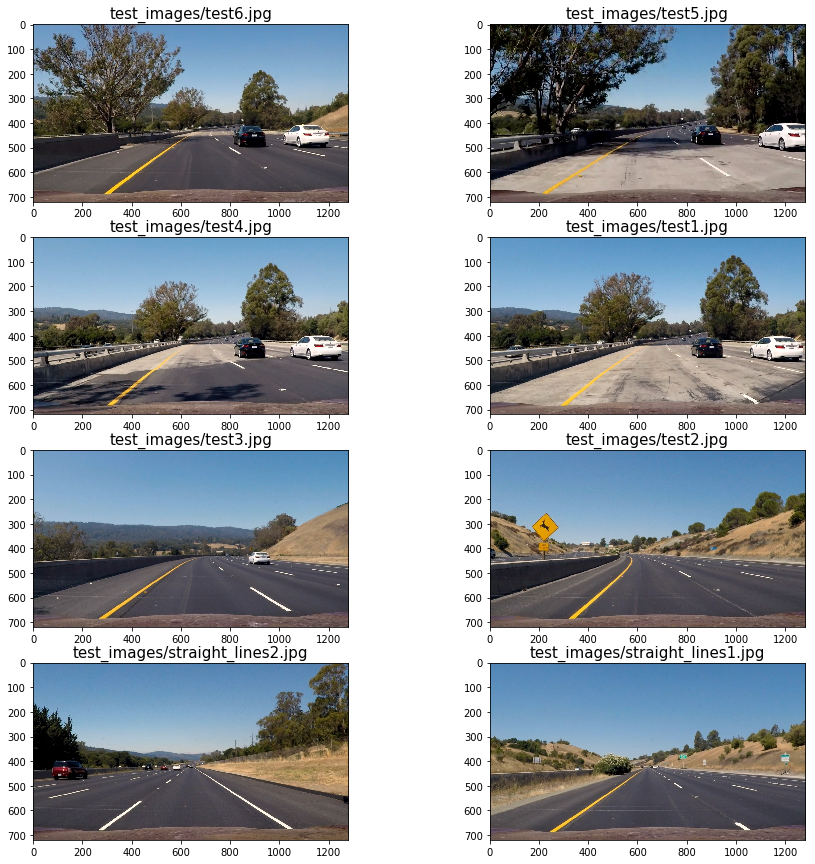

In [80]:
def show_images(images, cols = 4, rows = 5, figsize=(15,10), cmap = None):
    """
    Display `images` on a [`cols`, `rows`] subplot grid.
    """
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    indexes = range(cols * rows)
    
    for ax, index in zip(axes.flat, indexes):
        if index < len(images):
            filename_image, image = images[index]
            if cmap == None:
                ax.imshow(image)
            else:
                ax.imshow(image, cmap=cmap)
            ax.set_title(filename_image, fontsize=15)
            #ax.axis('off')
        
# show_images(list(map(lambda img: (img[0], cv2.cvtColor(img[1], cv2.COLOR_BGR2RGB)), test_images)), 2, 4, (20, 15))
show_images(test_images, 2, 4, (15,15))



### Apply a distortion correction to raw images

Text(0.5,1,'Undistort Image')

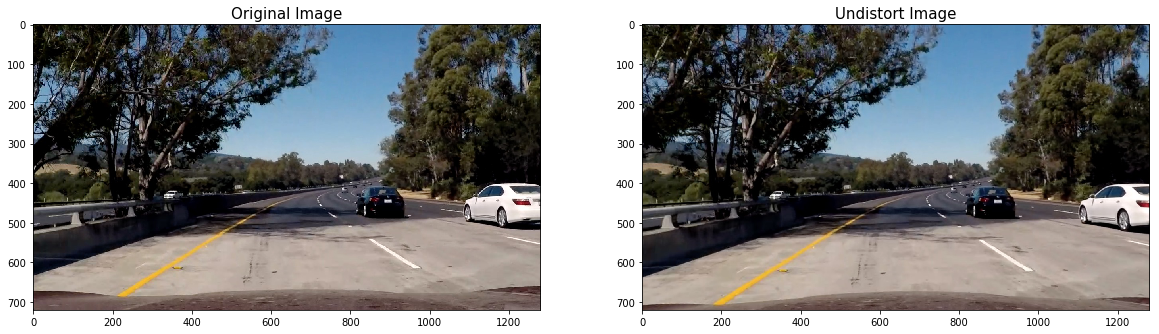

In [77]:
# Loading camera calibration (see 01_Camera_Calibartion.ipynb)
camera_cal = pickle.load(open('camera_cal/camera_calibration.p', 'rb'))
mtx, dist = map(camera_cal.get, ('mtx', 'dist'))

index = 1
test_image = test_images[index][1]

undistort_image = cv2.undistort(test_image, mtx, dist, None, mtx)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(test_image)
axes[0].set_title('Original Image', fontsize=15)
axes[1].imshow(undistort_image)
axes[1].set_title('Undistort Image', fontsize=15)

## Use color transforms, gradients, etc., to create a thresholded binary image